<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODUL11 - MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 3

In [1]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Object Detection**


Metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


### 2. Implementasi template matching
cv.matchTemplate(), dengan parameter.
- **image** : citra input
- **temptl** : template yang dicari, ukurannya tidak boleh lebih besar dari citra input
- **method** : metode dari template matching

Jenis metode :
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCDRR
4. TM_CCDRR_NORMED
5. TM_CCDEFF
6. TM_CCDEFF_NORMED

#### 1. TM_SQDIFF

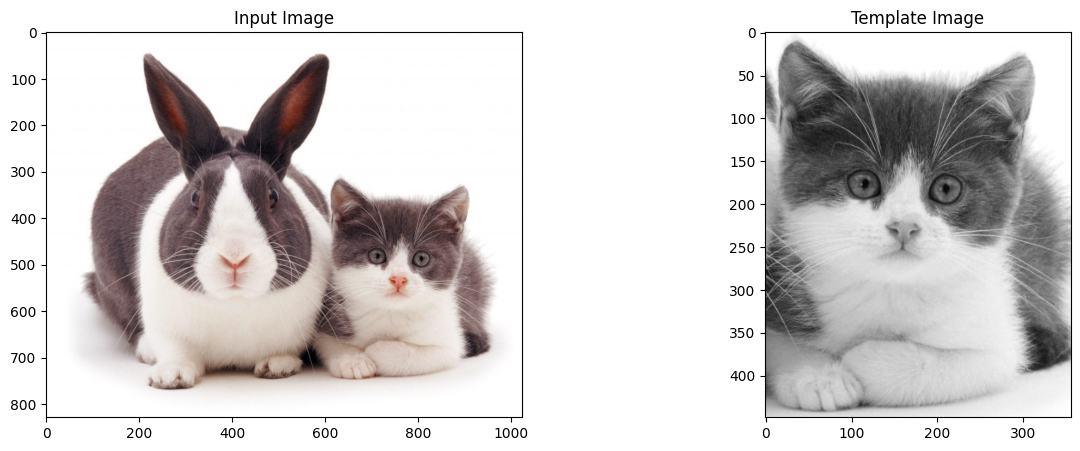

In [39]:
# TM_SQDIFF
img_input = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_input = cv.cvtColor(img_input, cv.COLOR_BGR2RGB)

img_template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg',cv.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i, (image, title) in enumerate([(img_input, 'Input Image'), (img_template, 'Template Image')]):
    axes[i].imshow(image,cmap='gray' if i == 1 else None)
    axes[i].set_title(title)
plt.show()


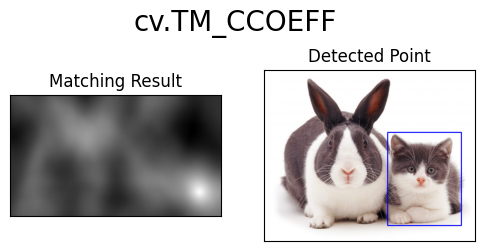

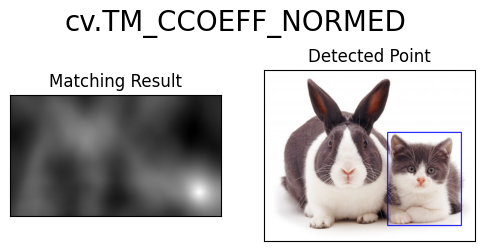

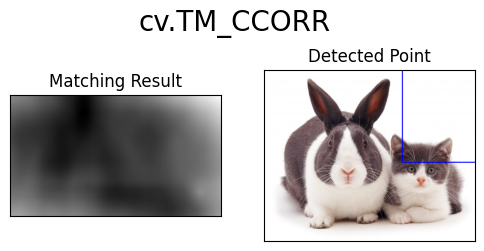

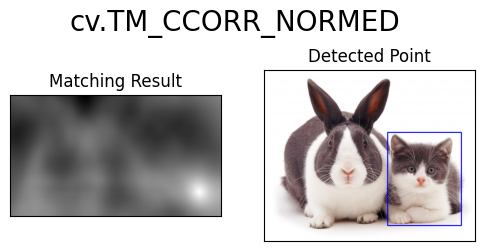

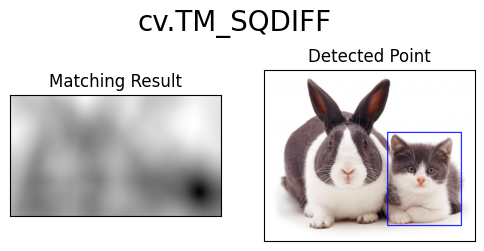

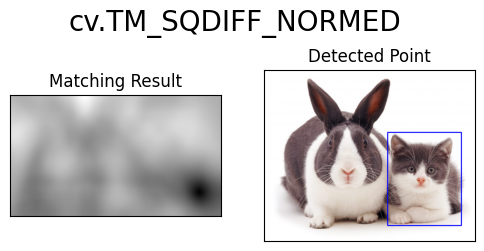

In [41]:
img = cv.cvtColor(img_input, cv.COLOR_BGR2GRAY)

h, w = img_template.shape
# Define template matching methods to be used
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Loop over each method
for meth in methods:
    # Create copy of input image
    img_copy = img_input.copy()

    # Get template matching method
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img, img_template, method)

    # Get top-left corner of the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Get bottom-right corner of the best match
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the best match
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 3)

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    ax1.imshow(res, cmap='gray')
    ax1.set_title('Matching Result')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(img_copy)
    ax2.set_title('Detected Point')
    ax2.set_xticks([])
    ax2.set_yticks([])
    fig.suptitle(meth, fontsize=20)
    plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:
